In [1]:
# Local paths
dir_pfx = './'
data_dir = dir_pfx + '../../data/Vehicules1024/'
# Add the local_modules directory to the set of paths
# Python uses to look for imports.

import sys
sys.path.append(dir_pfx)
sys.path.append('../')
sys.path.append('../../')

In [2]:
#!pip3 install -q git+https://www.github.com/keras-team/keras-contrib.git
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils
import DenseSRGAN

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Data
Load num_images 1024x1024 overhead arial images from VEDAI dataset and create 64x64 patches with corresponding 16x16 down sampled by 4x images.


In [4]:
# Grab a sample image for prediction and reconstruction
num_images = 10
files = utils.scan_dataset(data_dir, num_images) #TODO: 50
training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)

#im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))
im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))

The following image is missing!: 00000005
Using 9 images.
Saving files to ./../../data/Vehicules1024/


# View patches
Original images are 4 channel RGB + IR. Show a sample patch, and it's corresponding downsampled patch.


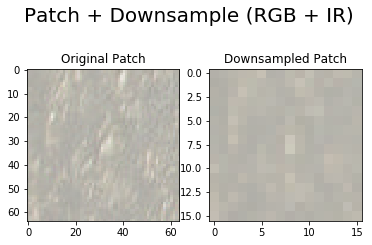

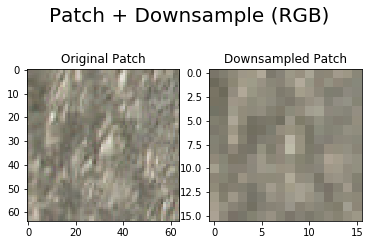

In [5]:
ix = 20

plt.figure().suptitle('Patch + Downsample (RGB + IR)', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,:])
plt.title('Original Patch')
plt.subplot(1,2,2)
plt.imshow(im_lr[ix,:,:,:])
plt.title('Downsampled Patch')
plt.show()

plt.figure().suptitle('Patch + Downsample (RGB)', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,0:3])
plt.title('Original Patch')
plt.subplot(1,2,2)
plt.title('Downsampled Patch')
plt.imshow(im_lr[ix,:,:,0:3])
plt.show()

# Restitch Images
Take on images worth of patches and restitch 64x64 or 16x16 patches and show image


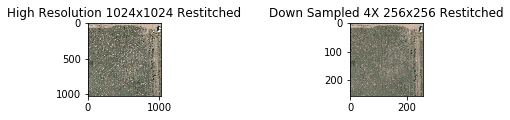

In [12]:
im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,2)

img = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))
plt.figure()
plt.imshow(img[:,:,0:3])
plt.title("High Resolution 1024x1024 Restitched")
plt.show()

img = utils.restitch_image_patches(im_lr_patched,(256,256,4))
plt.figure()
plt.imshow(img[:,:,0:3])
plt.title("Down Sampled 4X 256x256 Restitched")
plt.show()

# Prediction Super Resolution (Epoch 790)
Show side by side comparison of restitched image both original and super resolved patches

In [6]:
gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",weights_path=dir_pfx + 'weights/OH/790/') # 790,900,1100 epochs

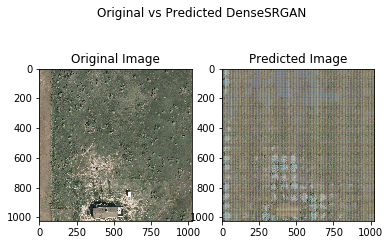

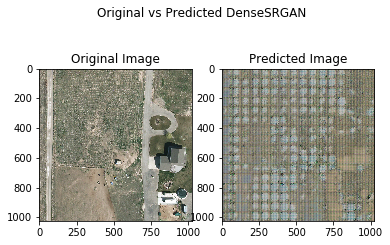

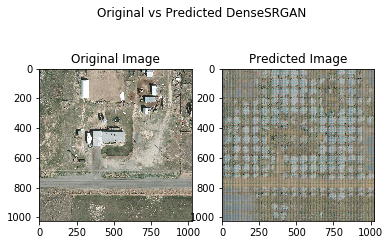

In [8]:
loss_1

for i in range(len(training_set)):

  im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,i)


  pred_patches = gan.gen.predict(im_lr_patched)

  pred_img_stiched = utils.restitch_image_patches(pred_patches,(1024,1024,4))
  orig_img_stitched = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))


  plt.figure().suptitle('Original vs Predicted DenseSRGAN')
  plt.subplot(1,2,1)
  plt.imshow(orig_img_stitched[:,:,0:3])
  plt.title('Original Image')
  plt.subplot(1,2,2)
  plt.imshow(pred_img_stiched[:,:,0:3])
  plt.title('Predicted Image')
  plt.savefig('{0}{1}pred_epoch_790_sample_{2}'.format(dir_pfx,'figures/',i))

# Prediction Super Resolution (Epoch 900)
Show side by side comparison of restitched image both original and super resolved patches
(You can find these figures in the figures directory)

In [26]:
# Create an instance of
gan2 = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,proj_pfx="OH",weights_path=dir_pfx + 'weights/OH/900/')

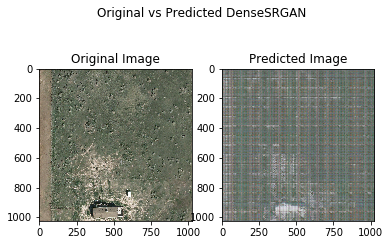

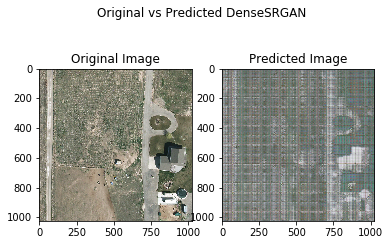

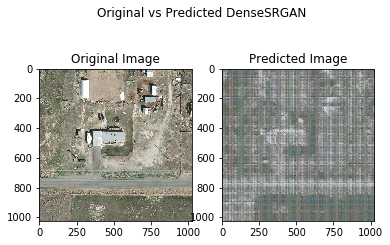

In [27]:
for i in range(len(training_set)):

  im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,i)


  pred_patches = gan2.gen.predict(im_lr_patched)

  pred_img_stiched = utils.restitch_image_patches(pred_patches,(1024,1024,4))
  orig_img_stitched = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))


  plt.figure().suptitle('Original vs Predicted DenseSRGAN')
  plt.subplot(1,2,1)
  plt.imshow(orig_img_stitched[:,:,0:3])
  plt.title('Original Image')
  plt.subplot(1,2,2)
  plt.imshow(pred_img_stiched[:,:,0:3])
  plt.title('Predicted Image')
  plt.savefig('{0}{1}pred_epoch_1100_sample_{2}'.format(dir_pfx,'figures/',i))

# Calculate PSNR of Predicted Images

In [33]:
im_hr_patched,im_lr_patched = utils.get_img_patches(im_hr,im_lr,2)
im_pred_patched = gan2.gen.predict(im_lr_patched)
im_hr   = utils.restitch_image_patches(im_hr_patched,(1024,1024,4))
im_pred = utils.restitch_image_patches(im_pred_patched,(1024,1024,4))

In [47]:
PSNR(im_hr,im_pred)

14.632065000758658

In [46]:
def PSNR(im1, im2): 
    assert im1.shape == im2.shape, 'Images must be the same dimension'
    im_h = im1.shape[0]
    im_w = im1.shape[1]
    im_c = im1.shape[2]
    mse = np.sum((im1 - im2)**2)/(im_w*im_h*im_c)
    return 10*np.log10(1**2/mse)